In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [7]:
Data = pd.read_csv('../Cluster1Mondayn.csv', index_col='Time', parse_dates=True)

In [38]:
data = Data.filter(['Energy'], axis=1)
Y = data ['Energy']

In [9]:
print(data.head())

                       Energy
Time                         
2018-01-01 00:00:00  0.228003
2018-01-01 00:15:00  0.228003
2018-01-01 00:30:00  0.228003
2018-01-01 00:45:00  0.228003
2018-01-01 01:00:00  0.228003


/home/bhavesh/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'energy_usage')

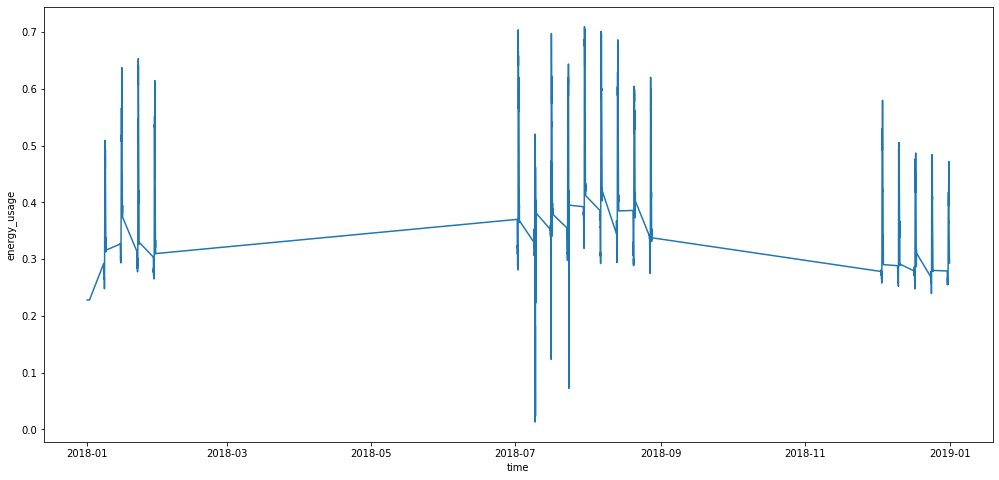

In [10]:
plt.figure(figsize=(17,8))
plt.plot(data)
plt.xlabel('time')
plt.ylabel('energy_usage')

In [11]:
#Moving Average

rolling_mean = data.rolling(96).mean()
rolling_std = data.rolling(96).std()

In [217]:
rolling_mean

,Energy
Time,
2018-01-01 00:00:00,NaN
2018-01-01 00:15:00,NaN
2018-01-01 00:30:00,NaN
2018-01-01 00:45:00,NaN
2018-01-01 01:00:00,NaN
...,...
2018-12-31 22:45:00,0.326582
2018-12-31 23:00:00,0.326708
2018-12-31 23:15:00,0.326872


In [13]:
data

,Energy
Time,
2018-01-01 00:00:00,0.228003
2018-01-01 00:15:00,0.228003
2018-01-01 00:30:00,0.228003
2018-01-01 00:45:00,0.228003
2018-01-01 01:00:00,0.228003
...,...
2018-12-31 22:45:00,0.297636
2018-12-31 23:00:00,0.295781
2018-12-31 23:15:00,0.298563


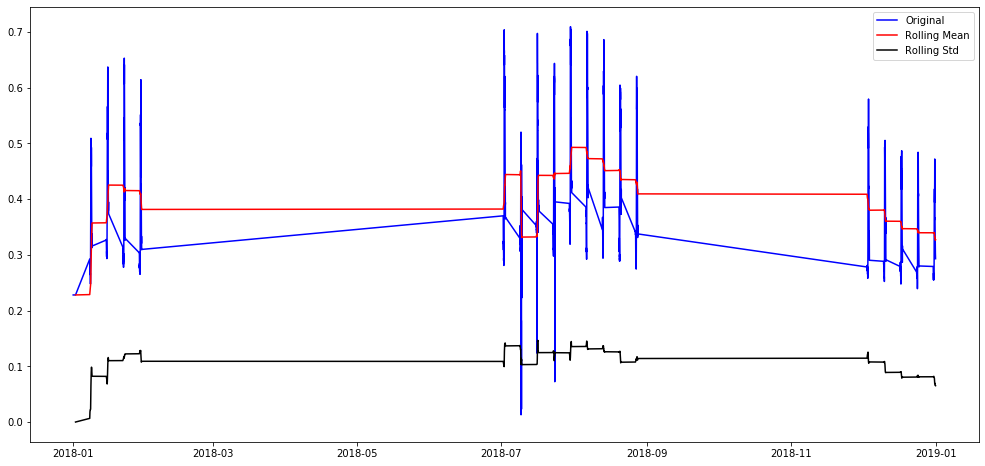

In [14]:
plt.figure(figsize=(17,8))
original = plt.plot(data, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')

In [15]:
print('Dicky - Fuller test:')
df_test = adfuller(data['Energy'], autolag='AIC')

df_out = pd.Series(df_test[0:4], index = ['Test Statistics', 'P-Value', 'Lags-used', 'Nums of observations used'])


for key, value in df_test[4].items():
    df_out['Critical Value (%s)'%key] = value

    
print(df_out)
print('-'*100)
if df_out['Test Statistics'] < df_out['Critical Value (5%)']:
    print('Reject the null hypothesis, Time Series is stationary')
else:
    print('Time Series is not stationary')
    
print('our P-value is low too!')

Dicky - Fuller test:
Test Statistics             -7.866285e+00
P-Value                      5.124403e-12
Lags-used                    2.400000e+01
Nums of observations used    1.799000e+03
Critical Value (1%)         -3.433990e+00
Critical Value (5%)         -2.863148e+00
Critical Value (10%)        -2.567626e+00
dtype: float64
----------------------------------------------------------------------------------------------------
Reject the null hypothesis, Time Series is stationary
our P-value is low too!


Since my test statistics -7.86 is less than my critical value(5%) which is -2.8631 I reject my null hypothesis

In [16]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=96).mean()
    movingSTD = timeseries.rolling(window=96).std()
    
    #Plot rolling statistics
    plt.figure(figsize = (17,8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

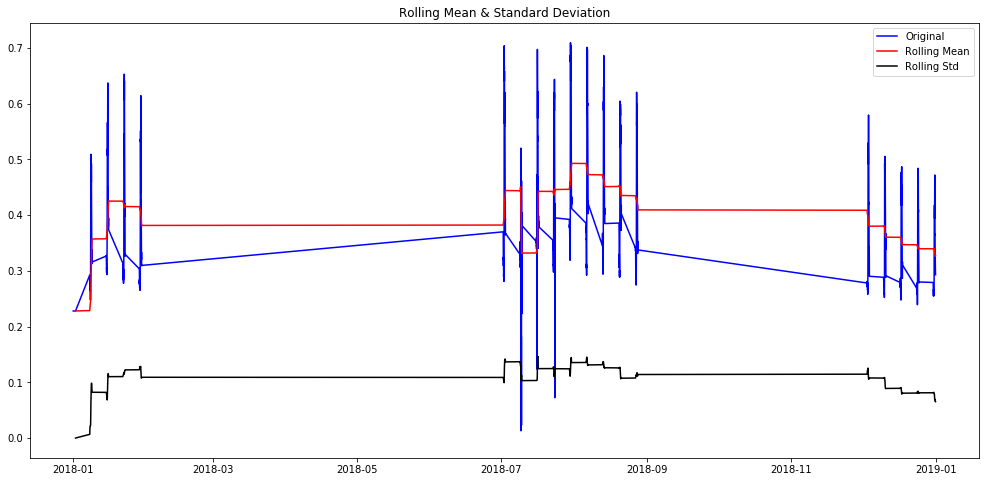

Results of Dickey Fuller Test:
Test Statistic                -7.866285e+00
p-value                        5.124403e-12
#Lags Used                     2.400000e+01
Number of Observations Used    1.799000e+03
Critical Value (1%)           -3.433990e+00
Critical Value (5%)           -2.863148e+00
Critical Value (10%)          -2.567626e+00
dtype: float64


In [17]:
test_stationarity(data['Energy'])

In [18]:
dataShift = data - data.shift()

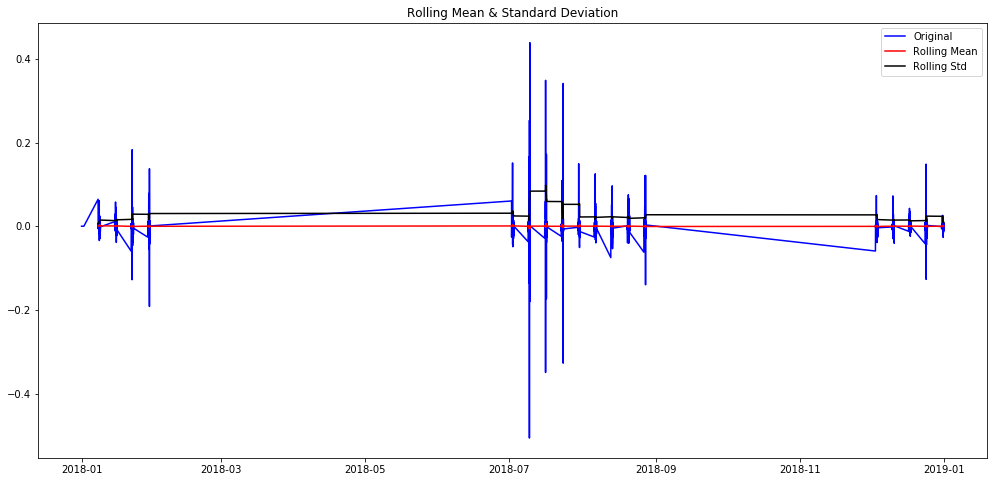

Results of Dickey Fuller Test:
Test Statistic                -9.249124e+00
p-value                        1.508921e-15
#Lags Used                     1.700000e+01
Number of Observations Used    1.805000e+03
Critical Value (1%)           -3.433978e+00
Critical Value (5%)           -2.863143e+00
Critical Value (10%)          -2.567623e+00
dtype: float64


In [19]:
dataShift.dropna(inplace=True)
test_stationarity(dataShift['Energy'])

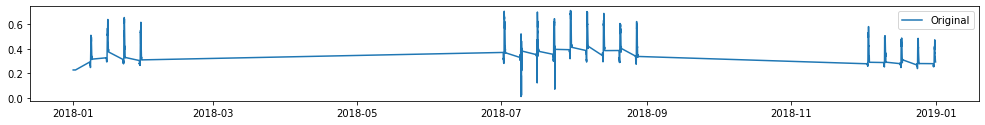

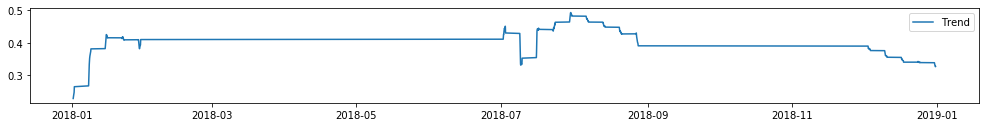

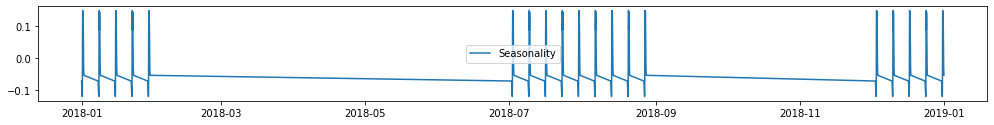

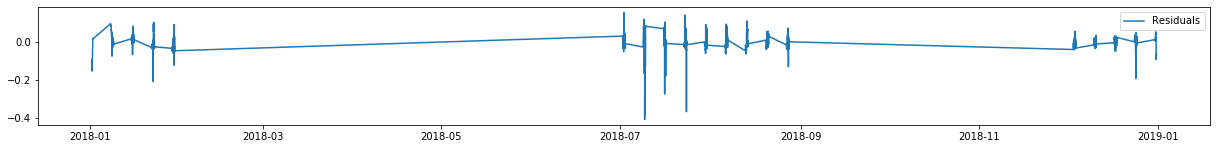

In [20]:
decomposition = seasonal_decompose(data['Energy'], freq=96) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(17,8))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')

plt.figure(figsize=(17,8))
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.figure(figsize=(17,8))
plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.figure(figsize=(17,8))
plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


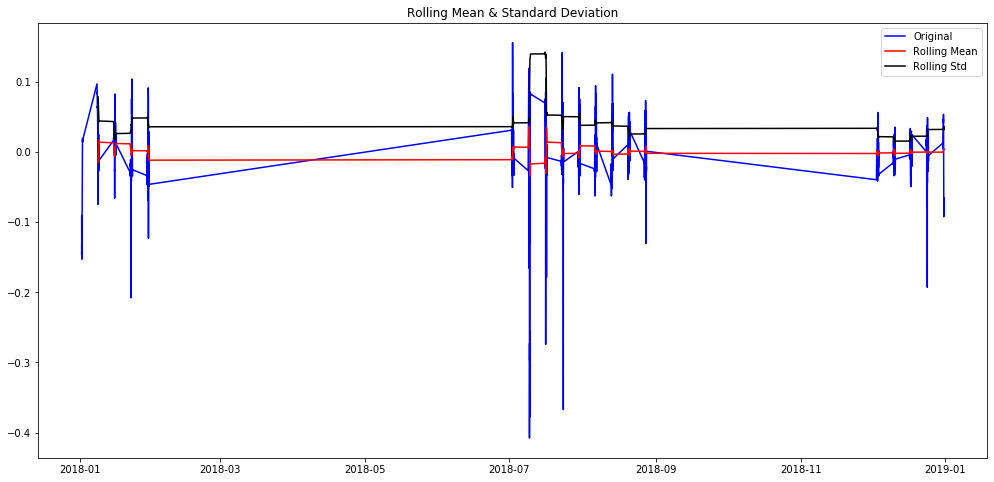

Results of Dickey Fuller Test:
Test Statistic                -9.397443e+00
p-value                        6.318429e-16
#Lags Used                     2.500000e+01
Number of Observations Used    1.702000e+03
Critical Value (1%)           -3.434198e+00
Critical Value (5%)           -2.863240e+00
Critical Value (10%)          -2.567675e+00
dtype: float64


In [21]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

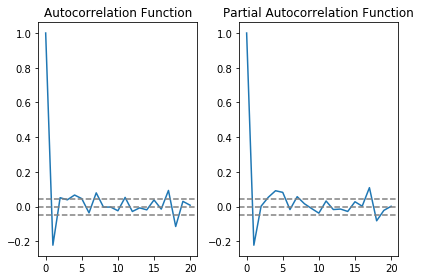

In [24]:
lag_acf = acf(dataShift, nlags=20)
lag_pacf = pacf(dataShift, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataShift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataShift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataShift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

/home/bhavesh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/bhavesh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA model


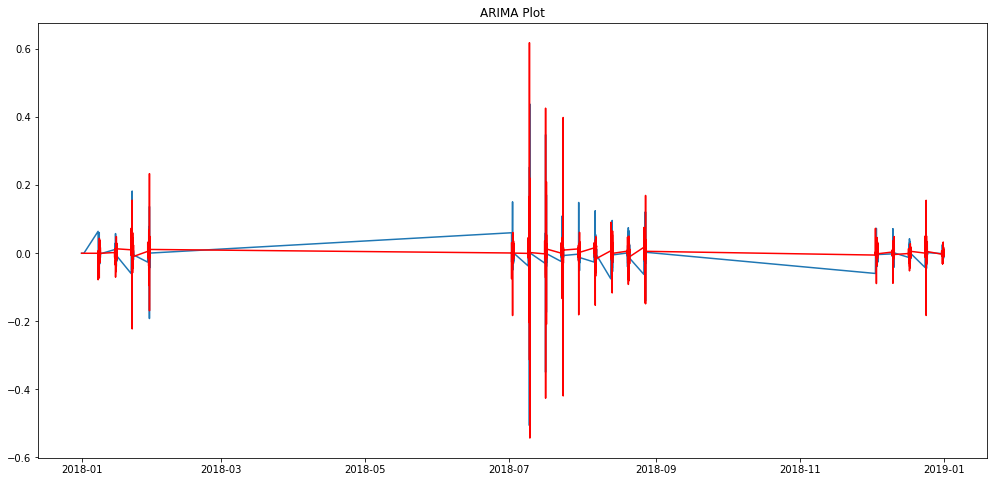

In [27]:
# AR+I+MA = ARIMA model
model = ARIMA(dataShift, order=(3,1,2))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(17,8))
plt.plot(dataShift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA Plot')
print('Plotting ARIMA model')

In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Time
2018-01-01 00:30:00   -4.874583e-07
2018-01-01 00:45:00   -7.859741e-07
2018-01-01 01:00:00   -1.092599e-06
2018-01-01 01:15:00   -1.369067e-06
2018-01-01 01:30:00   -1.684354e-06
dtype: float64


In [29]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Time
2018-01-01 00:30:00   -4.874583e-07
2018-01-01 00:45:00   -1.273432e-06
2018-01-01 01:00:00   -2.366032e-06
2018-01-01 01:15:00   -3.735098e-06
2018-01-01 01:30:00   -5.419452e-06
                           ...     
2018-12-31 22:45:00    1.698617e-02
2018-12-31 23:00:00    1.883103e-02
2018-12-31 23:15:00    2.054219e-02
2018-12-31 23:30:00    1.668930e-02
2018-12-31 23:45:00    1.842886e-02
Length: 1822, dtype: float64


In [31]:
predictions_ARIMA = pd.Series(data['Energy'].iloc[0], index=data.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA

Time
2018-01-01 00:00:00    0.228003
2018-01-01 00:15:00    0.228003
2018-01-01 00:30:00    0.228002
2018-01-01 00:45:00    0.228002
2018-01-01 01:00:00    0.228000
                         ...   
2018-12-31 22:45:00    0.244989
2018-12-31 23:00:00    0.246834
2018-12-31 23:15:00    0.248545
2018-12-31 23:30:00    0.244692
2018-12-31 23:45:00    0.246432
Length: 1824, dtype: float64

In [32]:
predictions = pd.DataFrame(predictions_ARIMA)

# Metrics

In [61]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
MSE_ARIMA = MSE(Y, predictions)
RMSE_ARIMA = MSE(Y, predictions)**(0.5)
MAE_ARIMA = MAE(Y, predictions)
MAPE_ARIMA = MAPE(Y, predictions)
R2_ARIMA = r2_score(Y, predictions)

In [63]:
Metric_ARIMA = {
    'MSE_ARIMA':MSE_ARIMA,
    'RMSE_ARIMA':RMSE_ARIMA,
    'MAE_ARIMA':MAE_ARIMA,
    'MAPE_ARIMA':MAPE_ARIMA,
    'R_Squared_ARIMA':R2_ARIMA
}

In [64]:
Metric_ARIMA

{'MSE_ARIMA': 0.08127319732417211,
 'RMSE_ARIMA': 0.2850845441692203,
 'MAE_ARIMA': 0.2116856599220946,
 'MAPE_ARIMA': 47.640076801047016,
 'R_Squared_ARIMA': -4.315945440278885}

In [301]:
predictions.to_csv('predictions_Arima.csv') 